# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from lib_file import lib_path
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import os
for dirname,_,filenames in os.walk('train_test_data'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

train_test_data\X_test.csv
train_test_data\X_train.csv
train_test_data\y_test.csv
train_test_data\y_train.csv


# Data Loading

In [2]:
X_train = pd.read_csv('train_test_data/X_train.csv')
X_test = pd.read_csv('train_test_data/X_test.csv')
y_train = pd.read_csv('train_test_data/y_train.csv')
y_test = pd.read_csv('train_test_data/y_test.csv')

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(800, 11) (200, 11) (800, 1) (200, 1)


In [3]:
X_train.head()

,exang,cp,oldpeak,thalach,ca,slope,thal,sex,age,trestbps,restecg
0,1,1,0.2,121,1,2,2,0,74,120,0
1,0,2,0.6,163,1,1,3,1,50,140,1
2,0,1,0.0,138,0,1,2,0,45,112,1
3,1,0,1.0,118,1,1,2,1,47,110,0
4,0,2,0.0,172,0,2,2,0,63,135,0


In [4]:
y_train.head()

,target
0,1
1,0
2,1
3,0
4,1


In [5]:
X_test.head()

,exang,cp,oldpeak,thalach,ca,slope,thal,sex,age,trestbps,restecg
0,0,3,1.9,162,0,1,3,1,56,120,0
1,0,1,1.4,103,1,1,3,1,62,120,0
2,0,1,1.0,168,0,0,3,1,48,110,1
3,1,0,2.6,125,0,0,3,1,70,145,1
4,0,2,1.9,162,1,2,2,1,43,130,1


In [6]:
y_test.head()

,target
0,1
1,0
2,0
3,0
4,1


In [7]:
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape, X_test.shape)

(800, 11, 1) (200, 11, 1)


---

# Algorithm-1 : ConvolutionalNeuralNetwork

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPool1D, BatchNormalization, Dense, Dropout,Flatten
from tensorflow.keras.utils import to_categorical
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [9]:
cnn_model = Sequential()
cnn_model.add(Input(shape=(X_train.shape[1],X_train.shape[2])))
cnn_model.add(Conv1D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
cnn_model.add(Conv1D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
cnn_model.add(MaxPool1D())
cnn_model.add(Dropout(rate=0.2))
cnn_model.add(Conv1D(filters=64, kernel_size=2, strides=1, padding='same', activation='relu'))
cnn_model.add(Conv1D(filters=64, kernel_size=2, strides=1, padding='same', activation='relu'))
cnn_model.add(MaxPool1D())
cnn_model.add(Dropout(rate=0.2))
cnn_model.add(Conv1D(filters=128, kernel_size=2, strides=1, padding='same', activation='relu'))
cnn_model.add(Conv1D(filters=128, kernel_size=2, strides=1, padding='same', activation='relu'))
cnn_model.add(MaxPool1D())
cnn_model.add(Dropout(rate=0.2))
cnn_model.add(BatchNormalization())
cnn_model.add(Flatten())
cnn_model.add(Dense(units=256, activation='relu'))
cnn_model.add(Dense(units=2, activation='sigmoid'))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 32)            96        
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            2080      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 32)            0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 5, 32)             0         
                                                                 
 conv1d_2 (Conv1D)           (None, 5, 64)             4160      
                                                                 
 conv1d_3 (Conv1D)           (None, 5, 64)             8256      
                                                        

In [11]:
EPOCHS = 500
history = cnn_model.fit(
    x=X_train,
    y=y_train,
    batch_size=16,
    epochs=EPOCHS,
    validation_data=(X_test, y_test)
)

Epoch 1/500
50/50 [==============================] - 3s 23ms/step - loss: 0.7212 - accuracy: 0.5337 - val_loss: 0.6966 - val_accuracy: 0.6500
Epoch 2/500
50/50 [==============================] - 0s 6ms/step - loss: 0.6899 - accuracy: 0.5600 - val_loss: 0.8394 - val_accuracy: 0.5000
Epoch 3/500
50/50 [==============================] - 0s 7ms/step - loss: 0.6773 - accuracy: 0.5888 - val_loss: 0.6852 - val_accuracy: 0.6150
Epoch 4/500
50/50 [==============================] - 0s 6ms/step - loss: 0.6718 - accuracy: 0.5925 - val_loss: 0.7496 - val_accuracy: 0.5700
Epoch 5/500
50/50 [==============================] - 0s 6ms/step - loss: 0.6764 - accuracy: 0.6062 - val_loss: 0.7710 - val_accuracy: 0.5050
Epoch 6/500
50/50 [==============================] - 0s 6ms/step - loss: 0.6701 - accuracy: 0.5987 - val_loss: 0.6335 - val_accuracy: 0.6700
Epoch 7/500
50/50 [==============================] - 0s 6ms/step - loss: 0.6384 - accuracy: 0.6413 - val_loss: 0.6355 - val_accuracy: 0.6600
Epoch 8/500


Epoch 59/500
50/50 [==============================] - 0s 5ms/step - loss: 0.3514 - accuracy: 0.8650 - val_loss: 0.3783 - val_accuracy: 0.8350
Epoch 60/500
50/50 [==============================] - 0s 5ms/step - loss: 0.3291 - accuracy: 0.8662 - val_loss: 0.3723 - val_accuracy: 0.8550
Epoch 61/500
50/50 [==============================] - 0s 5ms/step - loss: 0.3325 - accuracy: 0.8687 - val_loss: 0.3945 - val_accuracy: 0.8350
Epoch 62/500
50/50 [==============================] - 0s 5ms/step - loss: 0.3312 - accuracy: 0.8537 - val_loss: 0.3648 - val_accuracy: 0.8400
Epoch 63/500
50/50 [==============================] - 0s 6ms/step - loss: 0.3275 - accuracy: 0.8575 - val_loss: 0.3810 - val_accuracy: 0.8250
Epoch 64/500
50/50 [==============================] - 0s 6ms/step - loss: 0.3429 - accuracy: 0.8612 - val_loss: 0.3785 - val_accuracy: 0.8450
Epoch 65/500
50/50 [==============================] - 0s 6ms/step - loss: 0.3277 - accuracy: 0.8675 - val_loss: 0.3641 - val_accuracy: 0.8400
Epoch 

50/50 [==============================] - 0s 6ms/step - loss: 0.1996 - accuracy: 0.9162 - val_loss: 0.2102 - val_accuracy: 0.9000
Epoch 174/500
50/50 [==============================] - 0s 6ms/step - loss: 0.1813 - accuracy: 0.9175 - val_loss: 0.2059 - val_accuracy: 0.9050
Epoch 175/500
50/50 [==============================] - 0s 6ms/step - loss: 0.2007 - accuracy: 0.9237 - val_loss: 0.1982 - val_accuracy: 0.8900
Epoch 176/500
50/50 [==============================] - 0s 6ms/step - loss: 0.1918 - accuracy: 0.9225 - val_loss: 0.1970 - val_accuracy: 0.9000
Epoch 177/500
50/50 [==============================] - 0s 6ms/step - loss: 0.1761 - accuracy: 0.9225 - val_loss: 0.2211 - val_accuracy: 0.8850
Epoch 178/500
50/50 [==============================] - 0s 6ms/step - loss: 0.2163 - accuracy: 0.9087 - val_loss: 0.1971 - val_accuracy: 0.9000
Epoch 179/500
50/50 [==============================] - 0s 7ms/step - loss: 0.2072 - accuracy: 0.9250 - val_loss: 0.2082 - val_accuracy: 0.9050
Epoch 180/500

50/50 [==============================] - 0s 5ms/step - loss: 0.1868 - accuracy: 0.9200 - val_loss: 0.1583 - val_accuracy: 0.9150
Epoch 288/500
50/50 [==============================] - 0s 5ms/step - loss: 0.1556 - accuracy: 0.9287 - val_loss: 0.1668 - val_accuracy: 0.9100
Epoch 289/500
50/50 [==============================] - 0s 5ms/step - loss: 0.1549 - accuracy: 0.9200 - val_loss: 0.1569 - val_accuracy: 0.9050
Epoch 290/500
50/50 [==============================] - 0s 6ms/step - loss: 0.1768 - accuracy: 0.9200 - val_loss: 0.1644 - val_accuracy: 0.9100
Epoch 291/500
50/50 [==============================] - 0s 5ms/step - loss: 0.1478 - accuracy: 0.9300 - val_loss: 0.1509 - val_accuracy: 0.9100
Epoch 292/500
50/50 [==============================] - 0s 5ms/step - loss: 0.1353 - accuracy: 0.9325 - val_loss: 0.1486 - val_accuracy: 0.9100
Epoch 293/500
50/50 [==============================] - 0s 6ms/step - loss: 0.1462 - accuracy: 0.9312 - val_loss: 0.1811 - val_accuracy: 0.9150
Epoch 294/500

50/50 [==============================] - 0s 6ms/step - loss: 0.1349 - accuracy: 0.9400 - val_loss: 0.1362 - val_accuracy: 0.9250
Epoch 402/500
50/50 [==============================] - 0s 6ms/step - loss: 0.1455 - accuracy: 0.9425 - val_loss: 0.1387 - val_accuracy: 0.9250
Epoch 403/500
50/50 [==============================] - 0s 6ms/step - loss: 0.1365 - accuracy: 0.9325 - val_loss: 0.1326 - val_accuracy: 0.9350
Epoch 404/500
50/50 [==============================] - 0s 6ms/step - loss: 0.1319 - accuracy: 0.9388 - val_loss: 0.1339 - val_accuracy: 0.9350
Epoch 405/500
50/50 [==============================] - 0s 6ms/step - loss: 0.1547 - accuracy: 0.9337 - val_loss: 0.1328 - val_accuracy: 0.9300
Epoch 406/500
50/50 [==============================] - 0s 6ms/step - loss: 0.1633 - accuracy: 0.9350 - val_loss: 0.1409 - val_accuracy: 0.9250
Epoch 407/500
50/50 [==============================] - 0s 6ms/step - loss: 0.1245 - accuracy: 0.9388 - val_loss: 0.1312 - val_accuracy: 0.9300
Epoch 408/500

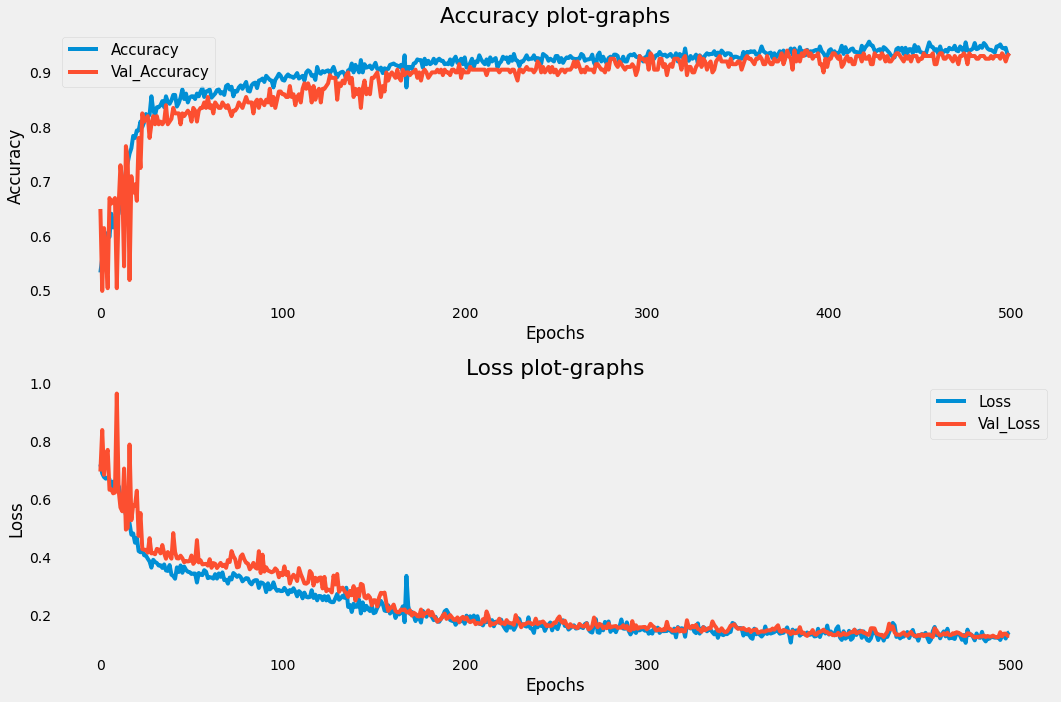

In [15]:
with plt.style.context(style="fivethirtyeight"):
    fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(15,10))
    plt.rcParams["font.size"]=15
    axes[0].plot(history.history['accuracy'],label='Accuracy')
    axes[0].plot(history.history['val_accuracy'],label='Val_Accuracy')
    axes[0].set_title(label='Accuracy plot-graphs')
    axes[0].set_xlabel(xlabel='Epochs')
    axes[0].set_ylabel(ylabel='Accuracy')
    axes[0].legend()
    axes[0].grid()
    axes[1].plot(history.history['loss'],label='Loss')
    axes[1].plot(history.history['val_loss'],label='Val_Loss')
    axes[1].set_title(label='Loss plot-graphs')
    axes[1].set_xlabel(xlabel='Epochs')
    axes[1].set_ylabel(ylabel='Loss')
    axes[1].legend()
    axes[1].grid()
    fig.tight_layout()
    plt.show()

In [16]:
cnn_probs = cnn_model.predict(X_test,verbose=1)
print(cnn_probs)

7/7 [==============================] - 0s 2ms/step
[[6.88606501e-02 9.32988703e-01]
 [9.98700619e-01 1.23605132e-03]
 [9.99564707e-01 4.47243452e-04]
 [9.99992847e-01 1.04535711e-05]
 [8.74891877e-03 9.91354346e-01]
 [3.21277618e-01 6.40844822e-01]
 [3.74314189e-03 9.96156573e-01]
 [1.56651422e-05 9.99985814e-01]
 [9.99441564e-01 5.80072403e-04]
 [9.99963164e-01 4.38710049e-05]
 [2.90662647e-05 9.99976516e-01]
 [7.64487624e-01 2.29096144e-01]
 [6.24233564e-07 9.99999523e-01]
 [9.99599576e-01 4.11033630e-04]
 [9.98951077e-01 1.02418661e-03]
 [9.99979734e-01 2.64378650e-05]
 [3.15841112e-06 9.99996960e-01]
 [9.99998689e-01 1.92376524e-06]
 [1.36425854e-07 1.00000000e+00]
 [9.99991059e-01 1.10797782e-05]
 [8.85947049e-02 9.08036530e-01]
 [9.99513566e-01 4.98265028e-04]
 [1.32650137e-03 9.98893380e-01]
 [9.99998093e-01 2.46138757e-06]
 [6.37847185e-02 9.40927625e-01]
 [4.66250181e-02 9.12881374e-01]
 [4.68951583e-01 5.22323489e-01]
 [8.30918550e-04 9.99212027e-01]
 [9.99992490e-01 9.323722

In [17]:
cnn_labels=np.argmax(cnn_probs,axis=1)
print(cnn_labels.tolist())

[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]


In [18]:
true_labels=np.argmax(y_test,axis=1)
print(true_labels.tolist())

[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]


### Result Analysis

In [19]:
class_labels = ["NOT HEART DISEASE", "HEART DISEASE"]

***Accuracy Score***

In [20]:
cnn_model_accuracy=accuracy_score(y_true=true_labels,y_pred=cnn_labels)
print("Validation accuracy of convolutionalNeuralNetwork model is {:.2f}%".format(cnn_model_accuracy*100))

Validation accuracy of convolutionalNeuralNetwork model is 93.50%


***Classification Report***

In [21]:
print(classification_report(y_true=true_labels,y_pred=cnn_labels, target_names=class_labels))

                   precision    recall  f1-score   support

NOT HEART DISEASE       0.96      0.91      0.93       100
    HEART DISEASE       0.91      0.96      0.94       100

         accuracy                           0.94       200
        macro avg       0.94      0.94      0.93       200
     weighted avg       0.94      0.94      0.93       200



***Confusion Matrix***

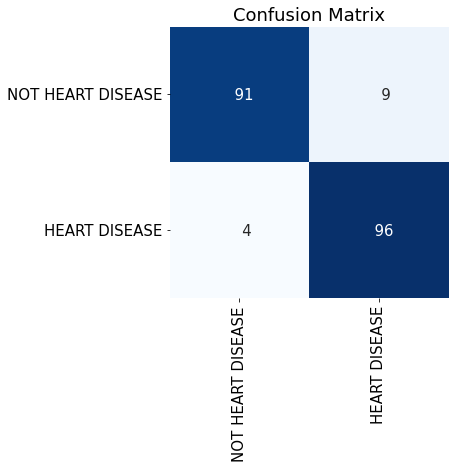

In [23]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
sns.heatmap(
    data=confusion_matrix(y_true=true_labels,y_pred=cnn_labels),
    annot=True,
    cmap=plt.cm.Blues,
    fmt = "4d",
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar=False
)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

***Model Saving***

In [24]:
cnn_model.save(filepath='models/ConvolutionalNeuralNetwork_model.h5')

In [25]:
import tensorflow as tf
tf.keras.backend.clear_session()

---

# Algorithm-2 : RecurrentNeuralNetwork

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, BatchNormalization, Dense, Dropout,Flatten

In [27]:
rnn_model = Sequential()
rnn_model.add(Input(shape=(X_train.shape[1],X_train.shape[2])))
rnn_model.add(SimpleRNN(units=200, recurrent_dropout=0.2, return_sequences=True))
rnn_model.add(Dropout(rate=0.2))
rnn_model.add(SimpleRNN(units=200, recurrent_dropout=0.2, return_sequences=True))
rnn_model.add(Dropout(rate=0.2))
rnn_model.add(BatchNormalization())
rnn_model.add(Flatten())
rnn_model.add(Dense(units=256, activation='relu'))
rnn_model.add(Dense(units=2, activation='sigmoid'))
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 11, 200)           40400     
                                                                 
 dropout (Dropout)           (None, 11, 200)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 11, 200)           80200     
                                                                 
 dropout_1 (Dropout)         (None, 11, 200)           0         
                                                                 
 batch_normalization (BatchN  (None, 11, 200)          800       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 2200)              0         
                                                        

In [29]:
EPOCHS = 500
history = rnn_model.fit(
    x=X_train,
    y=y_train,
    batch_size=16,
    epochs=EPOCHS,
    validation_data=(X_test, y_test)
)

Epoch 1/500
50/50 [==============================] - 4s 24ms/step - loss: 0.6437 - accuracy: 0.7412 - val_loss: 0.5984 - val_accuracy: 0.6350
Epoch 2/500
50/50 [==============================] - 1s 13ms/step - loss: 0.4669 - accuracy: 0.7987 - val_loss: 0.5228 - val_accuracy: 0.7800
Epoch 3/500
50/50 [==============================] - 1s 13ms/step - loss: 0.5060 - accuracy: 0.7638 - val_loss: 0.4759 - val_accuracy: 0.7350
Epoch 4/500
50/50 [==============================] - 1s 13ms/step - loss: 0.4522 - accuracy: 0.7950 - val_loss: 0.4374 - val_accuracy: 0.7800
Epoch 5/500
50/50 [==============================] - 1s 13ms/step - loss: 0.4470 - accuracy: 0.8062 - val_loss: 0.5127 - val_accuracy: 0.7500
Epoch 6/500
50/50 [==============================] - 1s 13ms/step - loss: 0.4631 - accuracy: 0.8037 - val_loss: 0.5534 - val_accuracy: 0.7050
Epoch 7/500
50/50 [==============================] - 1s 13ms/step - loss: 0.4411 - accuracy: 0.8075 - val_loss: 0.5649 - val_accuracy: 0.7200
Epoch 

50/50 [==============================] - 1s 20ms/step - loss: 0.1009 - accuracy: 0.9563 - val_loss: 0.2849 - val_accuracy: 0.9100
Epoch 116/500
50/50 [==============================] - 1s 20ms/step - loss: 0.1361 - accuracy: 0.9550 - val_loss: 0.1705 - val_accuracy: 0.9350
Epoch 117/500
50/50 [==============================] - 1s 16ms/step - loss: 0.1406 - accuracy: 0.9500 - val_loss: 0.1544 - val_accuracy: 0.9500
Epoch 118/500
50/50 [==============================] - 1s 17ms/step - loss: 0.1295 - accuracy: 0.9413 - val_loss: 0.1427 - val_accuracy: 0.9550
Epoch 119/500
50/50 [==============================] - 1s 17ms/step - loss: 0.1488 - accuracy: 0.9362 - val_loss: 0.1410 - val_accuracy: 0.9650
Epoch 120/500
50/50 [==============================] - 1s 18ms/step - loss: 0.1096 - accuracy: 0.9513 - val_loss: 0.1243 - val_accuracy: 0.9550
Epoch 121/500
50/50 [==============================] - 1s 16ms/step - loss: 0.1017 - accuracy: 0.9613 - val_loss: 0.1488 - val_accuracy: 0.9450
Epoch 

Epoch 172/500
50/50 [==============================] - 1s 17ms/step - loss: 0.0789 - accuracy: 0.9650 - val_loss: 0.1383 - val_accuracy: 0.9550
Epoch 173/500
50/50 [==============================] - 1s 19ms/step - loss: 0.0614 - accuracy: 0.9750 - val_loss: 0.1319 - val_accuracy: 0.9450
Epoch 174/500
50/50 [==============================] - 1s 19ms/step - loss: 0.0572 - accuracy: 0.9800 - val_loss: 0.1077 - val_accuracy: 0.9700
Epoch 175/500
50/50 [==============================] - 1s 17ms/step - loss: 0.0743 - accuracy: 0.9700 - val_loss: 0.1179 - val_accuracy: 0.9550
Epoch 176/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0607 - accuracy: 0.9750 - val_loss: 0.1246 - val_accuracy: 0.9550
Epoch 177/500
50/50 [==============================] - 1s 15ms/step - loss: 0.0681 - accuracy: 0.9725 - val_loss: 0.1594 - val_accuracy: 0.9550
Epoch 178/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0695 - accuracy: 0.9725 - val_loss: 0.1125 - val_accuracy:

Epoch 229/500
50/50 [==============================] - 1s 17ms/step - loss: 0.0576 - accuracy: 0.9762 - val_loss: 0.1307 - val_accuracy: 0.9550
Epoch 230/500
50/50 [==============================] - 1s 17ms/step - loss: 0.0586 - accuracy: 0.9712 - val_loss: 0.1187 - val_accuracy: 0.9550
Epoch 231/500
50/50 [==============================] - 1s 17ms/step - loss: 0.0950 - accuracy: 0.9625 - val_loss: 0.1713 - val_accuracy: 0.9500
Epoch 232/500
50/50 [==============================] - 1s 17ms/step - loss: 0.0559 - accuracy: 0.9725 - val_loss: 0.1369 - val_accuracy: 0.9550
Epoch 233/500
50/50 [==============================] - 1s 17ms/step - loss: 0.0575 - accuracy: 0.9737 - val_loss: 0.1057 - val_accuracy: 0.9550
Epoch 234/500
50/50 [==============================] - 1s 17ms/step - loss: 0.0455 - accuracy: 0.9787 - val_loss: 0.1130 - val_accuracy: 0.9600
Epoch 235/500
50/50 [==============================] - 1s 17ms/step - loss: 0.0474 - accuracy: 0.9775 - val_loss: 0.1444 - val_accuracy:

Epoch 286/500
50/50 [==============================] - 1s 15ms/step - loss: 0.0483 - accuracy: 0.9775 - val_loss: 0.2120 - val_accuracy: 0.9450
Epoch 287/500
50/50 [==============================] - 1s 17ms/step - loss: 0.0647 - accuracy: 0.9787 - val_loss: 0.1464 - val_accuracy: 0.9650
Epoch 288/500
50/50 [==============================] - 1s 15ms/step - loss: 0.0529 - accuracy: 0.9712 - val_loss: 0.1543 - val_accuracy: 0.9550
Epoch 289/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0460 - accuracy: 0.9762 - val_loss: 0.1597 - val_accuracy: 0.9500
Epoch 290/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0561 - accuracy: 0.9800 - val_loss: 0.1283 - val_accuracy: 0.9700
Epoch 291/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0430 - accuracy: 0.9850 - val_loss: 0.1284 - val_accuracy: 0.9700
Epoch 292/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0755 - accuracy: 0.9688 - val_loss: 0.1235 - val_accuracy:

Epoch 343/500
50/50 [==============================] - 1s 17ms/step - loss: 0.0428 - accuracy: 0.9850 - val_loss: 0.0933 - val_accuracy: 0.9750
Epoch 344/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0361 - accuracy: 0.9875 - val_loss: 0.1049 - val_accuracy: 0.9600
Epoch 345/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0364 - accuracy: 0.9837 - val_loss: 0.1105 - val_accuracy: 0.9650
Epoch 346/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0309 - accuracy: 0.9887 - val_loss: 0.1095 - val_accuracy: 0.9750
Epoch 347/500
50/50 [==============================] - 1s 17ms/step - loss: 0.0409 - accuracy: 0.9787 - val_loss: 0.1037 - val_accuracy: 0.9800
Epoch 348/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0469 - accuracy: 0.9825 - val_loss: 0.1090 - val_accuracy: 0.9650
Epoch 349/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0451 - accuracy: 0.9875 - val_loss: 0.1025 - val_accuracy:

Epoch 400/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0251 - accuracy: 0.9937 - val_loss: 0.1116 - val_accuracy: 0.9800
Epoch 401/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0324 - accuracy: 0.9862 - val_loss: 0.0938 - val_accuracy: 0.9850
Epoch 402/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0276 - accuracy: 0.9887 - val_loss: 0.1115 - val_accuracy: 0.9700
Epoch 403/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0473 - accuracy: 0.9812 - val_loss: 0.0879 - val_accuracy: 0.9850
Epoch 404/500
50/50 [==============================] - 1s 15ms/step - loss: 0.0273 - accuracy: 0.9900 - val_loss: 0.1088 - val_accuracy: 0.9800
Epoch 405/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0350 - accuracy: 0.9875 - val_loss: 0.0944 - val_accuracy: 0.9850
Epoch 406/500
50/50 [==============================] - 1s 16ms/step - loss: 0.0271 - accuracy: 0.9900 - val_loss: 0.0976 - val_accuracy:

Epoch 457/500
50/50 [==============================] - 1s 18ms/step - loss: 0.0404 - accuracy: 0.9812 - val_loss: 0.1324 - val_accuracy: 0.9700
Epoch 458/500
50/50 [==============================] - 1s 18ms/step - loss: 0.1135 - accuracy: 0.9712 - val_loss: 0.1218 - val_accuracy: 0.9800
Epoch 459/500
50/50 [==============================] - 1s 19ms/step - loss: 0.0328 - accuracy: 0.9875 - val_loss: 0.0846 - val_accuracy: 0.9850
Epoch 460/500
50/50 [==============================] - 1s 17ms/step - loss: 0.0421 - accuracy: 0.9825 - val_loss: 0.1380 - val_accuracy: 0.9800
Epoch 461/500
50/50 [==============================] - 1s 17ms/step - loss: 0.1057 - accuracy: 0.9700 - val_loss: 0.1186 - val_accuracy: 0.9750
Epoch 462/500
50/50 [==============================] - 1s 18ms/step - loss: 0.0794 - accuracy: 0.9775 - val_loss: 0.1242 - val_accuracy: 0.9600
Epoch 463/500
50/50 [==============================] - 1s 17ms/step - loss: 0.0541 - accuracy: 0.9800 - val_loss: 0.0827 - val_accuracy:

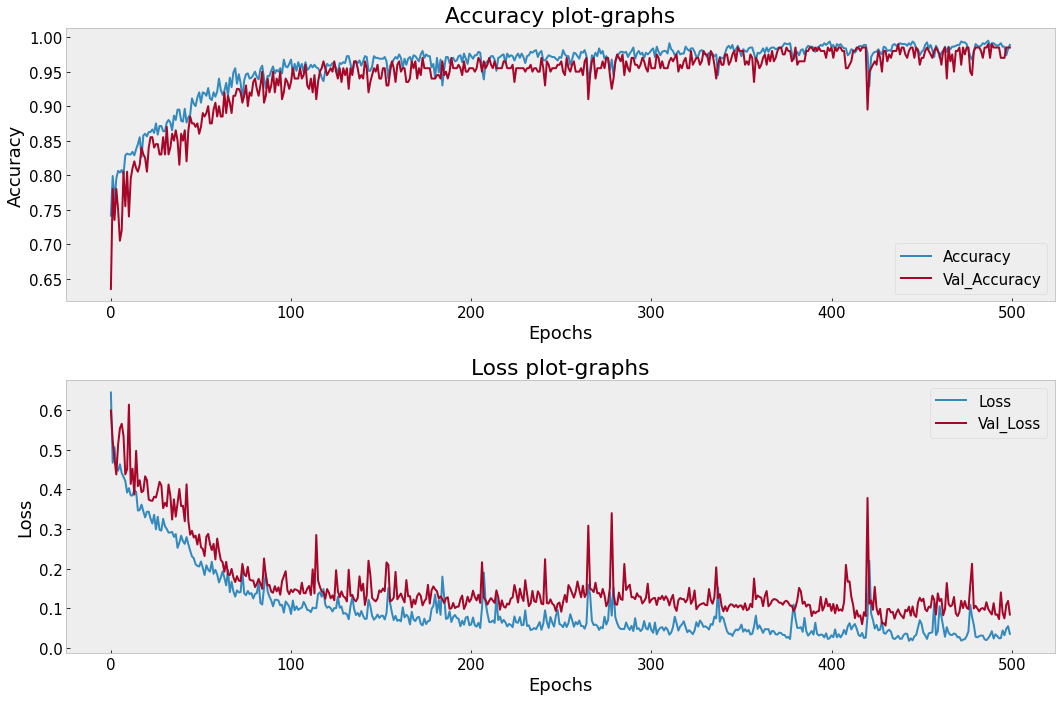

In [30]:
with plt.style.context(style="bmh"):
    fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(15,10))
    plt.rcParams["font.size"]=15
    axes[0].plot(history.history['accuracy'],label='Accuracy')
    axes[0].plot(history.history['val_accuracy'],label='Val_Accuracy')
    axes[0].set_title(label='Accuracy plot-graphs')
    axes[0].set_xlabel(xlabel='Epochs')
    axes[0].set_ylabel(ylabel='Accuracy')
    axes[0].legend()
    axes[0].grid()
    axes[1].plot(history.history['loss'],label='Loss')
    axes[1].plot(history.history['val_loss'],label='Val_Loss')
    axes[1].set_title(label='Loss plot-graphs')
    axes[1].set_xlabel(xlabel='Epochs')
    axes[1].set_ylabel(ylabel='Loss')
    axes[1].legend()
    axes[1].grid()
    fig.tight_layout()
    plt.show()

In [31]:
rnn_probs = rnn_model.predict(X_test,verbose=1)
print(rnn_probs)

7/7 [==============================] - 0s 5ms/step
[[1.23293489e-01 8.80775511e-01]
 [9.99999702e-01 3.55864529e-07]
 [9.99982834e-01 1.78062382e-05]
 [1.00000000e+00 1.04522866e-14]
 [8.82643690e-06 9.99991775e-01]
 [2.65955925e-04 9.99760509e-01]
 [2.34392537e-05 9.99977231e-01]
 [3.26881724e-13 1.00000000e+00]
 [1.00000000e+00 2.43931421e-13]
 [1.00000000e+00 9.52039003e-10]
 [1.96386561e-16 1.00000000e+00]
 [3.41384143e-01 6.57788932e-01]
 [8.92052412e-07 9.99999225e-01]
 [1.00000000e+00 9.98052840e-08]
 [9.99947309e-01 5.41170739e-05]
 [9.99996185e-01 4.35118136e-06]
 [1.23086030e-09 1.00000000e+00]
 [1.00000000e+00 8.54754513e-17]
 [4.21731165e-05 9.99960423e-01]
 [1.00000000e+00 3.93876859e-16]
 [1.49282813e-03 9.98444557e-01]
 [9.99807119e-01 2.06440687e-04]
 [2.17307612e-08 1.00000000e+00]
 [1.00000000e+00 6.53165510e-13]
 [2.23659135e-05 9.99978662e-01]
 [1.98116899e-03 9.96969223e-01]
 [9.23782587e-04 9.99168038e-01]
 [4.22254516e-06 9.99995232e-01]
 [1.00000000e+00 1.113966

In [32]:
rnn_labels=np.argmax(rnn_probs,axis=1)
print(rnn_labels.tolist())

[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]


In [33]:
true_labels=np.argmax(y_test,axis=1)
print(true_labels.tolist())

[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]


### Result Analysis

In [34]:
class_labels = ["NOT HEART DISEASE", "HEART DISEASE"]

***Accuracy Score***

In [35]:
rnn_model_accuracy=accuracy_score(y_true=true_labels,y_pred=rnn_labels)
print("Validation accuracy of RecurrentNeuralNetwork model is {:.2f}%".format(rnn_model_accuracy*100))

Validation accuracy of RecurrentNeuralNetwork model is 98.50%


***Classification Report***

In [36]:
print(classification_report(y_true=true_labels,y_pred=rnn_labels, target_names=class_labels))

                   precision    recall  f1-score   support

NOT HEART DISEASE       1.00      0.97      0.98       100
    HEART DISEASE       0.97      1.00      0.99       100

         accuracy                           0.98       200
        macro avg       0.99      0.98      0.98       200
     weighted avg       0.99      0.98      0.98       200



***Confusion Matrix***

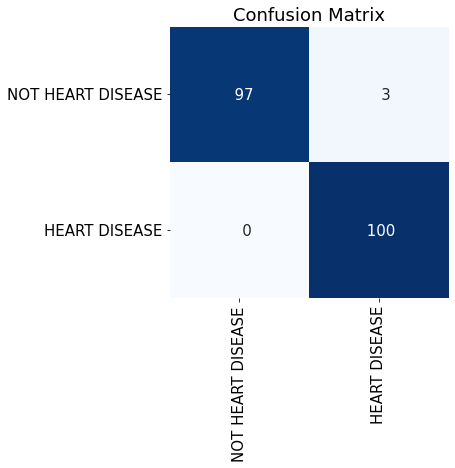

In [37]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
sns.heatmap(
    data=confusion_matrix(y_true=true_labels,y_pred=rnn_labels),
    annot=True,
    cmap=plt.cm.Blues,
    fmt = "4d",
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar=False
)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

***Model Saving***

In [38]:
rnn_model.save(filepath='models/RecurrentNeuralNetwork_model.h5')

---

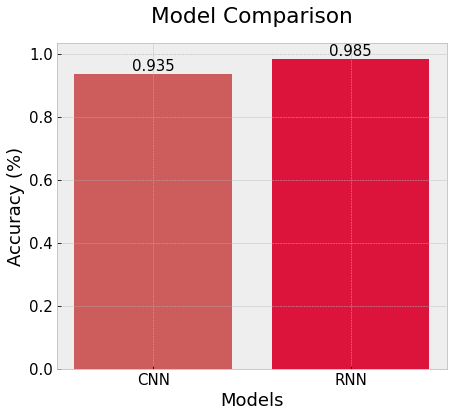

In [49]:
chart_data = [cnn_model_accuracy, rnn_model_accuracy]
chart_labels = ['CNN', 'RNN']

with plt.style.context(style="bmh"):
    plt.figure(figsize=(7,6))
    plt.bar(chart_labels, chart_data, color=['indianred', 'crimson'])
    for i, value in enumerate(chart_data):
        plt.text(i, value, str(value), ha='center', va='bottom')
    plt.xlabel('Models')
    plt.ylabel('Accuracy (%)')
    plt.title('Model Comparison', pad=20)
    plt.show()

---